# 1. Create graph using edgelist from edge_list.txt file from data folder. 

- Extract features from 1 recursive generations by using Rolx algorithm
- Run the Rolx algorithm and plot the graph that same nodes have same colour based on Rolx algorithm.

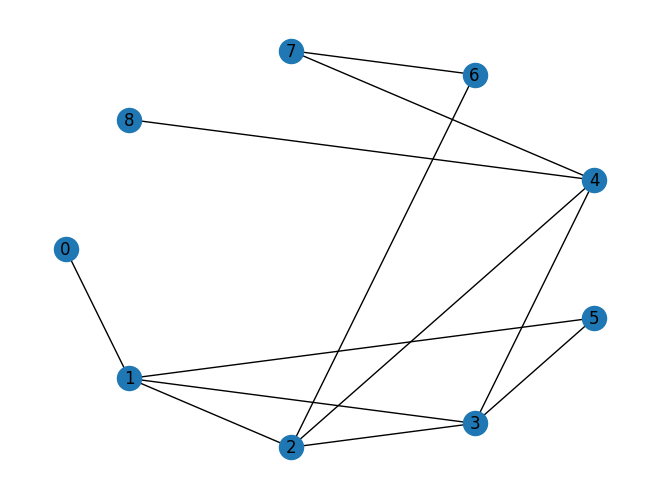

In [1]:
import networkx as nx
import networkx
import matplotlib.pyplot as plt

#  Undirected graph
G = nx.read_edgelist('./data/edge_list.txt')
nx.draw(G, pos=nx.shell_layout(G),with_labels = True)


In [2]:
import warnings
from pprint import pprint

import matplotlib.pyplot as plt
import networkx as nx
import seaborn as sns

from graphrole import RecursiveFeatureExtractor, RoleExtractor

# extract features from 1 recursive generations:
feature_extractor = RecursiveFeatureExtractor(G)
features = feature_extractor.extract_features()

print(f'Features extracted from {feature_extractor.generation_count} recursive generations:')
print(features)

Features extracted from 2 recursive generations:
   degree(mean)  external_edges(mean)  degree  internal_edges  external_edges
0          4.00                  3.00       1               1               3
1          2.75                  4.25       4               6               3
2          3.50                  4.00       4               6               6
3          3.50                  4.50       4               7               4
4          2.75                  4.25       4               5               5
5          4.00                  3.50       2               3               4
6          3.00                  5.00       2               2               4
7          3.00                  4.50       2               2               4
8          4.00                  5.00       1               1               3


In [3]:
# assign node roles
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)
node_roles = role_extractor.roles

print('\nNode role assignments:')
pprint(node_roles)

print('\nNode role membership by percentage:')
print(role_extractor.role_percentage.round(2))


Node role assignments:
{'0': 'role_0',
 '1': 'role_1',
 '2': 'role_0',
 '3': 'role_1',
 '4': 'role_1',
 '5': 'role_0',
 '6': 'role_3',
 '7': 'role_3',
 '8': 'role_2'}

Node role membership by percentage:
   role_0  role_1  role_2  role_3
0    0.53    0.03    0.41    0.03
1    0.02    0.61    0.26    0.12
2    0.41    0.41    0.02    0.17
3    0.17    0.57    0.24    0.02
4    0.24    0.42    0.02    0.32
5    0.50    0.24    0.24    0.02
6    0.16    0.16    0.16    0.52
7    0.25    0.16    0.16    0.44
8    0.26    0.03    0.46    0.26


In [4]:
# Build color palette for plotting
unique_roles = sorted(set(node_roles.values()))
color_map = sns.color_palette('Paired', n_colors = len(unique_roles))
# Map roles to colors
role_colors = {role: color_map[i] for i, role in enumerate(unique_roles)}
# Build list of colors for all nodes in G
node_colors = [role_colors[node_roles[node]] for node in G.nodes]

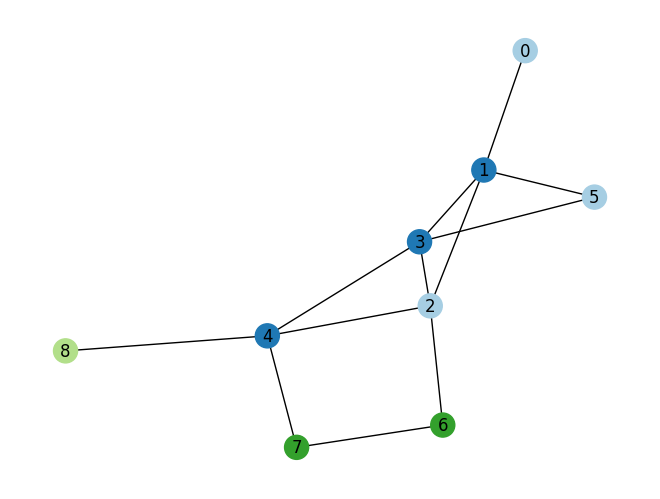

In [5]:
# plot graph
plt.figure()

with warnings.catch_warnings():
    # catch matplotlib deprecation warning
    warnings.simplefilter('ignore')
    nx.draw(
        G,
        pos=nx.spring_layout(G, seed=42),
        with_labels=True,
        node_color=node_colors,
    )

plt.show()


# 2. A undirected graph G with edge pairs as:
[(0, 1),(0, 2),(0, 3),(0, 5),(1, 3),(1, 6),(3, 4),(4, 5),(4, 7),(5, 8),(8, 9)].

a) Draw graph G. 

b) There are four nodes with the label 'A': 0,1,2,3. Otherwise, label 'B'

By using Learning with Local and Global Consistency, finding the labels of nodes 7 and 8   .
    


In [14]:
G = nx.Graph()
# add node/edge pairs
G.add_edges_from([(0, 1),(0, 2),(0, 3),(0, 5),(1, 3),(1, 6),(3, 4),(4, 5),(4, 7),(5, 8),(8, 9)])

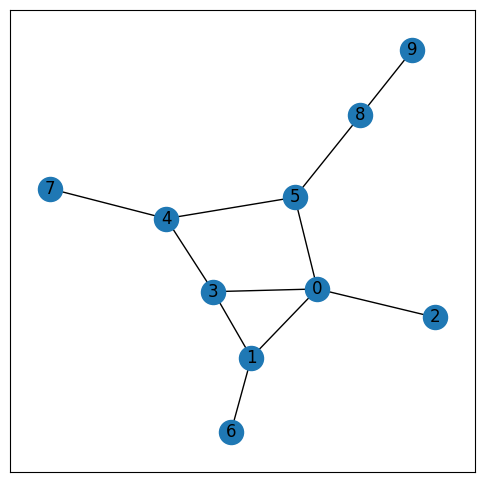

In [15]:
# draw the network G
plt.figure(figsize =(6, 6))
nx.draw_networkx(G, with_labels = True)

In [16]:
#Draw graphs with different labeled nodes
def draw_graph(G):
    clubs = []  # list to populate with labels
    for n in G.nodes:
        c = G.nodes[n]['label']
        col = 0
        if c=='A':
            clubs.append('green')
        elif c =='B':
            clubs.append('red')
        else:
            clubs.append('gray')
    pos = nx.spring_layout(G, seed=42) # To be able to recreate the graph layout
    nx.draw_networkx(G, pos=pos, node_color = clubs) # Plot the graph

In [17]:
# Filling labels for graph G
#There are four nodes with the label 'A': 0,1,2,3. Otherwise, the label is 'B'. 
#By using Learning with Local and Global Consistency, finding the labels of nodes 7 and 8 .

def fill_labels(G):
    for i in range(len(G.nodes)):
        if i <= 3:
            G.nodes[i]['label'] = 'A'
        else:
            G.nodes[i]['label'] = 'B'


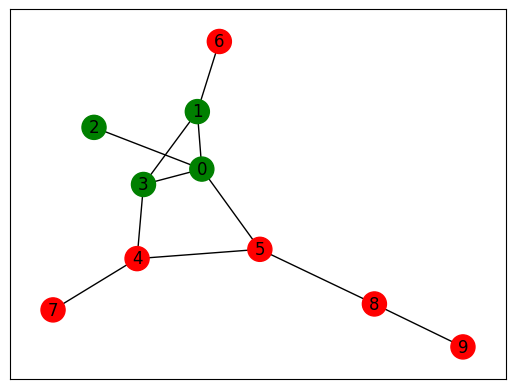

In [18]:
from networkx.algorithms import node_classification

mapping = {}
for i in G.nodes:
    mapping[i] = int(i)
#G = nx.relabel_nodes(G, mapping)

fill_labels(G)
#plt.show()
#nx.draw(G, with_labels=True)
draw_graph(G)

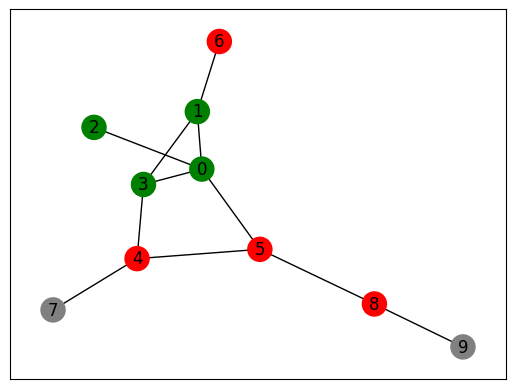

In [19]:
# Lets hide labels of nodes 9 and 7
unlabel_set = [9,7]
for n in unlabel_set:
   G.nodes[n]['label'] = ''
draw_graph(G)

In [20]:
predicted = node_classification.local_and_global_consistency(G)
predicted

['A', 'A', 'A', 'A', 'B', 'A', 'B', 'B', 'B', 'B']

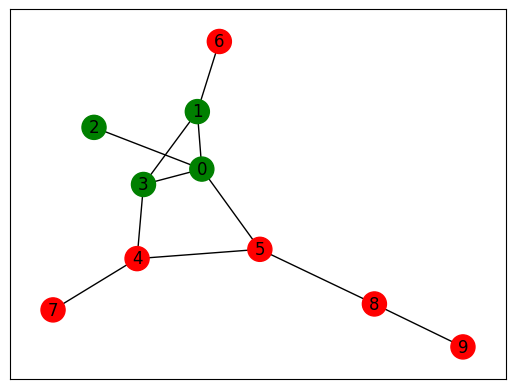

In [21]:
for i in range(len(G.nodes)):
    if G.nodes[i]['label']=='':
        G.nodes[i]['label']= predicted[i]
draw_graph(G)